In [1]:
#pip install pydicom
#pip uninstall -y enum34
#pip install labelme==3.16.7
import cv2
import json
import labelme
import os
import PIL
import shutil
import sys
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from labelme import utils
from pydicom import dcmread
from PIL import Image

In [44]:
json_file_name = 'sarcopenia_data/SARCOPANIA0010_1.json'
n_classes = 12
label_name_to_value = {}
json_data = json.load(open(json_file_name))
value_to_label_name = ['0. background' for _ in range(n_classes)]

#print(json_data["shapes"])
for shape in json_data["shapes"]:
    label_name = shape["label"]
    #label_name_to_value[label_name] = int(int(label_name.split('.')[0])*255/11)
    number = int(int(label_name.split('.')[0]))
    label_name_to_value[label_name] = number
    value_to_label_name[number] = label_name
    
print(label_name_to_value)
print(value_to_label_name)
with open('classes.txt', 'w') as f:
    for label in value_to_label_name:
        f.write("%s\n" % label)

{'5. Rt eretor spinae muscle': 5, '8. Lt trans abd,int and ext obl': 8, '9. Rt rectus abdominus muscle': 9, '2. Lt psoas major mucle': 2, '1. Rt psoas major mucle': 1, '3. Rt quardratus lumborum muscle': 3, '4. Lt quardratus lumborum muscle': 4, '6. Lt eretor spinae muscle': 6, '7. Rt trans abd,int and ext obl': 7, '10. Lt rectus abdominus muscle': 10, '11.L3 Vertebral body': 11}
['0. background', '1. Rt psoas major mucle', '2. Lt psoas major mucle', '3. Rt quardratus lumborum muscle', '4. Lt quardratus lumborum muscle', '5. Rt eretor spinae muscle', '6. Lt eretor spinae muscle', '7. Rt trans abd,int and ext obl', '8. Lt trans abd,int and ext obl', '9. Rt rectus abdominus muscle', '10. Lt rectus abdominus muscle', '11.L3 Vertebral body']


In [ ]:
file_list = glob('sarcopenia_data/*.dcm')
folder_list = ['train', 'valid', 'test']
ratio = [8, 1, 1]

for folder in folder_list:
    folder_path = os.path.join('sarcopenia_data', folder)
    if os.path.exists(folder_path):
        if os.path.isdir(folder_path):
            shutil.rmtree(folder_path)
    os.mkdir(folder_path)
    print(f'create folder {folder_path}')


In [148]:
for i, dcm_file_name in enumerate(glob('sarcopenia_data/*.dcm')):
    ds = dcmread(dcm_file_name)
    img = ds.pixel_array
    json_file_name = dcm_file_name.split('.')[0] + '_1.json'
    json_data = json.load(open(json_file_name))
    
    #img = utils.img_b64_to_array(json_data['imageData'])
    label = utils.shapes_to_label(img.shape, json_data['shapes'], label_name_to_value)
    #print(label)
    #captions = ['%d: %s' % (l, name) for l, name in enumerate(lbl_names)]
    gt_img = utils.draw_label(label, ds.pixel_array)

    folder = 'train'
    if i > len(file_list)*sum(ratio[:2])/sum(ratio):
        folder = 'test'
    elif i > len(file_list)*sum(ratio[:1])/sum(ratio):
        folder = 'valid'
    folder = 'all'
    
    #img_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'.png')
    img_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'.dcm')
    print(img_file_name)
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.imsave(img_file_name, img)
    shutil.copyfile(dcm_file_name, img_file_name)
    gt_file_name = os.path.join(dcm_file_name.split('/')[0], folder, dcm_file_name.split('/')[-1].split('.')[0]+'_gt.png')
    #plt.imshow(gt_img, cmap=plt.cm.gray)
    #print(label)
    #plt.imsave(gt_file_name, label)
    cv2.imwrite(gt_file_name, label)
    
    #print(label)
    #plt.show()
    
    #break


sarcopenia_data/all/SARCOPANIA0020.dcm
sarcopenia_data/all/SARCOPANIA0060.dcm
sarcopenia_data/all/SARCOPANIA0040.dcm
sarcopenia_data/all/SARCOPANIA0090.dcm
sarcopenia_data/all/SARCOPANIA0100.dcm
sarcopenia_data/all/SARCOPANIA0110.dcm
sarcopenia_data/all/SARCOPANIA0050.dcm
sarcopenia_data/all/SARCOPANIA0130.dcm
sarcopenia_data/all/SARCOPANIA0140.dcm
sarcopenia_data/all/SARCOPANIA0080.dcm
sarcopenia_data/all/SARCOPANIA0120.dcm
sarcopenia_data/all/SARCOPANIA0150.dcm
sarcopenia_data/all/SARCOPANIA0170.dcm
sarcopenia_data/all/SARCOPANIA0200.dcm
sarcopenia_data/all/SARCOPANIA0030.dcm
sarcopenia_data/all/SARCOPANIA0190.dcm
sarcopenia_data/all/SARCOPANIA0070.dcm
sarcopenia_data/all/SARCOPANIA0210.dcm
sarcopenia_data/all/SARCOPANIA0250.dcm
sarcopenia_data/all/SARCOPANIA0230.dcm
sarcopenia_data/all/SARCOPANIA0260.dcm
sarcopenia_data/all/SARCOPANIA0280.dcm
sarcopenia_data/all/SARCOPANIA0330.dcm
sarcopenia_data/all/SARCOPANIA0240.dcm
sarcopenia_data/all/SARCOPANIA0300.dcm
sarcopenia_data/all/SARCO

In [9]:
ds = dcmread('sarcopenia_data/SARCOPANIA0010.dcm')
img = ds.pixel_array
print(img.shape)
plt.imsave('SARCOPANIA0010_1.png', img, cmap=plt.cm.gray)

(512, 512)


In [8]:
a='./../sarcopenia_data/train/SARCOPANIA0190.png'
a.split('.png')[0]

'./../sarcopenia_data/train/SARCOPANIA0190'

In [16]:
from PIL import Image
GT = Image.open('sarcopenia_data/train/SARCOPANIA0020_gt.png')
print(GT.size)
GT = np.array(GT)
print(GT.any())
index = np.nonzero(GT)
print(len(index[0]))
print(GT[index])

(512, 512)
True
29378
[9 9 9 ... 6 6 6]
(12,)


In [ ]:
import torch
from Image_Segmentation.network import U_Net, AttU_Net
from Image_Segmentation.evaluation import get_DC

net = AttU_Net(img_ch=3, output_ch=12).to('cuda')
net.load_state_dict(torch.load('Image_Segmentation/models/AttU_Net-f4-199-0.863.pkl'))
            
net.train(False)
#net.eval()

sarcopenia_data/train_valid/SARCOPANIA0030.dcm
Dice score 0.9784464141679214
<_io.TextIOWrapper name='sarcopenia_data/train_valid/SARCOPANIA0030.json' mode='w' encoding='UTF-8'>


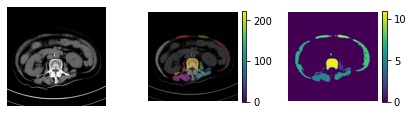

In [79]:
import json
import torch.nn.functional as F
from glob import glob
from torchvision import transforms as T

from labelme.utils.image import img_b64_to_arr, img_arr_to_b64


count = 0
for file in glob('sarcopenia_data/train_valid/*.dcm'):
#for file in glob('sarcopenia_data/valid/*_gt.png'):
#for file in glob('sarcopenia_data/test/*_gt.png'):
    image_name = file.split('.')[0]
    
    image_path = image_name+'.dcm'
    print(image_path)
    #gt_path = image_name+'_gt.png'

    ds = dcmread(image_path)
    image = ds.pixel_array
    image_h, image_w = image.shape
    image = image.astype('float64')
    intercept = ds.RescaleIntercept
    wc = 50
    ww = 250
    UL = wc + ww/2
    LL = wc - ww/2
    """
    try:
        wc = ds.WindowCenter[0]
        ww = ds.WindowWidth[0]
        UL = wc + ww/2
        LL = wc - ww/2
    except:
        wc = ds.WindowCenter
        ww = ds.WindowWidth
        UL = wc + ww/2
        LL = wc - ww/2
    """
    #print(f'window param {wc}, {ww}')
    slope = ds.RescaleSlope
    image -= (-intercept+LL)
    image[image<0] = 0
    image[image>(UL-LL)] = UL-LL
    image *= 255.0/image.max()
    image = image.astype('uint8')
    image = Image.fromarray(image)
    image_src = image.convert('RGB')
    
    #image_gt = Image.open(gt_path)

    Transform = []
    Transform.append(T.ToTensor())
    Transform = T.Compose(Transform)

    image = Transform(image_src)

    Norm_ = T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))   
    image = Norm_(image)

    image = image.unsqueeze(0).to('cuda')

    pred = torch.sigmoid(net(image))
    pred = pred.squeeze(0).detach().cpu()
    
    GT_path = image_path.split('.dcm')[0] + '_1.json'
    #GT = Image.open(GT_path)
    json_data = json.load(open(GT_path))
    gt_label = utils.shapes_to_label(np.array(image_src).shape, json_data['shapes'], label_name_to_value)
    gt_img = utils.draw_label(gt_label, np.array(image_src))

    gt_label = torch.tensor(np.array(gt_label), dtype=torch.int64)
    gt_label = torch.nn.functional.one_hot(gt_label, n_classes).to(torch.float).permute(2,0,1)
    print(f'Dice score {get_DC(pred, gt_label)}')
    pred = np.argmax(pred, axis=0)
    
    shapes = []
    for i in range(1, n_classes):
        mask = pred[pred==i]
        layer = np.array(pred==i, np.uint8)*255 
        contours, _ = cv2.findContours(layer, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            contour = cv2.approxPolyDP(contour, 3, True).reshape(-1, 2).tolist()
            if len(contour) < 3: continue
            shape_data = {"label": value_to_label_name[i],
                          "points": contour,
                          "group_id": None,
                          "shape_type": "polygon",
                          "flags": {},
                         }
            shapes.append(shape_data)
        #plt.show()
        
    json_data = {"version": "4.5.6",
                 "flag": {},
                 "imagePath": image_name.split('/')[-1]+'.png',
                 "imageData": None,
                 "imageHeight": image_h,
                 "imageWidth": image_w,
                 "shapes": shapes,
                }
    with open(image_name+'.json', 'w') as outfile:
        json.dump(json_data, outfile)
    print(outfile)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.tight_layout()
    #print(image.shape)
    im1 = ax1.imshow(np.array(image_src))
    #print(image_src.size)
    #image_src.save(image_name+'.png')
    ax1.set_axis_off()

    im2 = ax2.imshow(gt_img)
    fig.colorbar(im2, ax=ax2, fraction=0.046)
    ax2.set_axis_off()

    im3 = ax3.imshow(pred)
    ax3.set_axis_off()
    fig.colorbar(im3, ax=ax3, fraction=0.046)
    plt.show()
    #print(f'Dice score {get_DC(pred, T.ToTensor()(image_gt))}')
    break
    #count += 1
    #if count > 5:
    #    break

In [124]:
n = 5
indices = torch.randint(0, n, size=(4,7))
one_hot = torch.nn.functional.one_hot(indices, n) # size=(4,7,n)
print(indices)
print(one_hot.shape)
print(np.argmax(one_hot, axis=2))

tensor([[3, 3, 2, 4, 0, 1, 4],
        [4, 4, 4, 1, 1, 3, 1],
        [3, 3, 1, 1, 4, 3, 4],
        [2, 3, 4, 3, 4, 2, 3]])
torch.Size([4, 7, 5])
tensor([[3, 3, 2, 4, 0, 1, 4],
        [4, 4, 4, 1, 1, 3, 1],
        [3, 3, 1, 1, 4, 3, 4],
        [2, 3, 4, 3, 4, 2, 3]])


In [3]:
from pydicom import dcmread
ds = dcmread('../NCKU/download/SARCOPANIA0010.dcm')
image = ds.pixel_array
print(image.size)


NameError: name 'dcmread' is not defined

In [6]:
import boto3
import os
from botocore.client import Config
from botocore.exceptions import ClientError


def download_s3_file(endpoint, access_key, secret_key, bucket, dicom_filepath, dicom_file):
    config = Config(signature_version='s3')
    is_verify = False
    connection = boto3.client(
        's3',
        aws_access_key_id=access_key,
        aws_secret_access_key=secret_key,
        endpoint_url=endpoint,
        config=config,
        verify=True,
    )
    docker_dicom_filepath = dicom_file #os.path.join(docker_dicom_dir, dicom_file)

    try:
        connection.download_file(bucket, dicom_filepath, docker_dicom_filepath)
    except ClientError as e:
        pass

    if os.path.isfile(docker_dicom_filepath):
        return True
    else:
        return False

In [7]:
#request_dict = request.json
endpoint = "https://www.google.com/url?q=https://s3.twcc.ai&sa=D&source=hangouts&ust=1618297288632000&usg=AFQjCNFG1vU0AzR_MGtkJUa3hU9mfvSv0g"
endpoint = "https://s3.twcc.ai"
access_key = "5QL09M2O1Y8E4GTOFC9Z"
secret_key = "9mXMT1kJAYAzOGZusIc5CT856cc3O22FqaYZpeTN"
bucket = "test-bucket-sarcopenia"
dicom_filepath = "Sarcopenia_data/SARCOPANIA0030.dcm"

# Download file from S3 blob
if endpoint and access_key and secret_key and bucket and dicom_filepath:
    dicom_file = dicom_filepath.split('/')[-1]
    if not download_s3_file(endpoint, access_key, secret_key, bucket, dicom_filepath, dicom_file):
        print( "The file does not download from S3 blob")

In [91]:
print(__name__)

__main__


In [5]:
from sarcopenia_inference_app import Sarcopenia_Inference_APP
sar_app = Sarcopenia_Inference_APP()


INFO:root:loading segmentation model
INFO:root:done


In [1]:
from sarcopenia_inference_app import Sarcopenia_Inference_APP
sar_app = Sarcopenia_Inference_APP()
import json
from glob import glob 


file_list = ["Sarcopenia_data/SARCOPANIA0370.dcm",
             "Sarcopenia_data/SARCOPANIA0350.dcm",
             "Sarcopenia_data/SARCOPANIA0420.dcm"]

file_list = glob("sarcopenia_data/L1L4/**/*.dcm", recursive=True)

#dicom_list, json_list = app.inference_from_list(file_list, endpoint="https://s3.twcc.ai",
#                        access_key="5QL09M2O1Y8E4GTOFC9Z",
#                        secret_key="9mXMT1kJAYAzOGZusIc5CT856cc3O22FqaYZpeTN",
#                        bucket="test-bucket-sarcopenia")

#print(dicom_list, json_list)

for dicomf in file_list:
    #if not dicomf: continue
    print(dicomf)
    jsonf = sar_app.inference(dicomf)
    output = dicomf.split(".")[0]+".json"
    print(output)
    with open(output, "w") as f:
        json.dump(jsonf, f)

INFO:root:loading segmentation model
INFO:root:done


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08230078_08230078/112453_56921912.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08230078_08230078/112453_56921912.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08230078_08230078/112453_56921912.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08865804_08865804/112453_56913763.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08865804_08865804/112453_56913763.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08865804_08865804/112453_56913763.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/11919513_11919513/112453_56924292.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/11919513_11919513/112453_56924292.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/11919513_11919513/112453_56924292.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/05297861_05297861/112453_56923136.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/05297861_05297861/112453_56923136.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/05297861_05297861/112453_56923136.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/00330495_00330495/112453_56923487.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/00330495_00330495/112453_56923487.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/00330495_00330495/112453_56923487.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/06923470_06923470/112453_56914153.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/06923470_06923470/112453_56914153.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/06923470_06923470/112453_56914153.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/05153996_05153996/112453_56919614.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/05153996_05153996/112453_56919614.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/05153996_05153996/112453_56919614.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08283970_08283970/112453_56919137.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08283970_08283970/112453_56919137.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08283970_08283970/112453_56919137.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/11638455_11638455/112453_56923611.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/11638455_11638455/112453_56923611.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/11638455_11638455/112453_56923611.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/00093739_00093739/112453_56894019.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/00093739_00093739/112453_56894019.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/00093739_00093739/112453_56894019.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/09027172_09027172/112453_56914827.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/09027172_09027172/112453_56914827.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/09027172_09027172/112453_56914827.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/06554505_06554505/112453_56913245.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/06554505_06554505/112453_56913245.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/06554505_06554505/112453_56913245.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/01957028_01957028/112453_56922903.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/01957028_01957028/112453_56922903.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/01957028_01957028/112453_56922903.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08500342_08500342/112453_56919229.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08500342_08500342/112453_56919229.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/08500342_08500342/112453_56919229.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/03305335_03305335/112453_56924151.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/03305335_03305335/112453_56924151.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/03305335_03305335/112453_56924151.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/17538016_17538016/112453_56916457.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/17538016_17538016/112453_56916457.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/17538016_17538016/112453_56916457.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/13731423_13731423/112453_56917586.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/13731423_13731423/112453_56917586.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0701_0800/Normal/L3_Green/13731423_13731423/112453_56917586.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/11285610_11285610/994326_57184550.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/11285610_11285610/994326_57184550.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/11285610_11285610/994326_57184550.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/02046378_02046378/994326_57331199.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/02046378_02046378/994326_57331199.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/02046378_02046378/994326_57331199.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/02909755_02909755/994326_57187463.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/02909755_02909755/994326_57187463.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/02909755_02909755/994326_57187463.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08951738_08951738/994326_57175229.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08951738_08951738/994326_57175229.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08951738_08951738/994326_57175229.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09805008_09805008/994326_57331427.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09805008_09805008/994326_57331427.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09805008_09805008/994326_57331427.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/14685832_14685832/994326_57180222.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/14685832_14685832/994326_57180222.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/14685832_14685832/994326_57180222.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/06810272_06810272/994326_57187237.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/06810272_06810272/994326_57187237.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/06810272_06810272/994326_57187237.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/10540378_10540378/994326_57190720.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/10540378_10540378/994326_57190720.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/10540378_10540378/994326_57190720.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/01053230_01053230/994326_57178277.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/01053230_01053230/994326_57178277.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/01053230_01053230/994326_57178277.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/13533975_13533975/994326_57334566.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/13533975_13533975/994326_57334566.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/13533975_13533975/994326_57334566.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05557682_05557682/994326_57175770.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05557682_05557682/994326_57175770.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05557682_05557682/994326_57175770.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/13511614_13511614/994326_57179721.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/13511614_13511614/994326_57179721.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/13511614_13511614/994326_57179721.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16247180_16247180/994326_57332212.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16247180_16247180/994326_57332212.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16247180_16247180/994326_57332212.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/15311467_15311467/994326_57189790.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/15311467_15311467/994326_57189790.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/15311467_15311467/994326_57189790.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/00115479_913014P09908/994326_68542171.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/00115479_913014P09908/994326_68542171.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/00115479_913014P09908/994326_68542171.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/15517333_15517333/994326_57193754.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/15517333_15517333/994326_57193754.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/15517333_15517333/994326_57193754.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09168357_09168357/994326_57185965.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09168357_09168357/994326_57185965.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09168357_09168357/994326_57185965.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05960043_05960043/994326_57181491.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05960043_05960043/994326_57181491.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05960043_05960043/994326_57181491.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08218788_08218788/994326_57182298.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08218788_08218788/994326_57182298.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08218788_08218788/994326_57182298.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/00018599_00018599/994326_57187031.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/00018599_00018599/994326_57187031.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/00018599_00018599/994326_57187031.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16644074_16644074/994326_57186740.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16644074_16644074/994326_57186740.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16644074_16644074/994326_57186740.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05350983_05350983/994326_57189187.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05350983_05350983/994326_57189187.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/05350983_05350983/994326_57189187.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08888286_08888286/994326_57192048.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08888286_08888286/994326_57192048.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/08888286_08888286/994326_57192048.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/07523674_07523674/994326_57190553.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/07523674_07523674/994326_57190553.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/07523674_07523674/994326_57190553.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/10319445_10319445/994326_57188753.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/10319445_10319445/994326_57188753.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/10319445_10319445/994326_57188753.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/12018183_12018183/994326_57192773.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/12018183_12018183/994326_57192773.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/12018183_12018183/994326_57192773.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09657416_09657416/994326_57191822.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09657416_09657416/994326_57191822.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/09657416_09657416/994326_57191822.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/06371493_06371493/994326_57175924.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/06371493_06371493/994326_57175924.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/06371493_06371493/994326_57175924.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16684487_16684487/994326_57186451.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16684487_16684487/994326_57186451.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/16684487_16684487/994326_57186451.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/07101179_07101179/994326_57192316.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/07101179_07101179/994326_57192316.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1001_1100/Normal/L3_Green/07101179_07101179/994326_57192316.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/18495299_18495299/960930_56812539.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/18495299_18495299/960930_56812539.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/18495299_18495299/960930_56812539.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/18544691_18544691/112453_56815729.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/18544691_18544691/112453_56815729.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/18544691_18544691/112453_56815729.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16812183_16812183/112453_56866026.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16812183_16812183/112453_56866026.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16812183_16812183/112453_56866026.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/14841557_14841557/112453_56869931.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/14841557_14841557/112453_56869931.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/14841557_14841557/112453_56869931.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12743259_12743259/112453_56862755.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12743259_12743259/112453_56862755.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12743259_12743259/112453_56862755.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16560055_16560055/112453_56867924.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16560055_16560055/112453_56867924.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16560055_16560055/112453_56867924.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12968660_12968660/960930_56808569.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12968660_12968660/960930_56808569.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12968660_12968660/960930_56808569.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15765954_15765954/112453_56869659.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15765954_15765954/112453_56869659.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15765954_15765954/112453_56869659.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/02239441_02239441/960930_56807700.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/02239441_02239441/960930_56807700.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/02239441_02239441/960930_56807700.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16108781_16108781/960930_56808022.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16108781_16108781/960930_56808022.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16108781_16108781/960930_56808022.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/13256974_13256974/112453_56869317.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/13256974_13256974/112453_56869317.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/13256974_13256974/112453_56869317.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/09542364_09542364/112453_56863449.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/09542364_09542364/112453_56863449.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/09542364_09542364/112453_56863449.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/05353262_05353262/112453_56870381.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/05353262_05353262/112453_56870381.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/05353262_05353262/112453_56870381.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00278892_916017Q11952/112453_68543852.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00278892_916017Q11952/112453_68543852.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00278892_916017Q11952/112453_68543852.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12192775_12192775/112453_56865624.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12192775_12192775/112453_56865624.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12192775_12192775/112453_56865624.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15827641_15827641/960930_56811067.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15827641_15827641/960930_56811067.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15827641_15827641/960930_56811067.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10574311_10574311/960930_56809999.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10574311_10574311/960930_56809999.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10574311_10574311/960930_56809999.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00597833_00597833/960930_56811750.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00597833_00597833/960930_56811750.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00597833_00597833/960930_56811750.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/05047134_05047134/960930_56810353.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/05047134_05047134/960930_56810353.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/05047134_05047134/960930_56810353.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03130945_03130945/112453_56863867.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03130945_03130945/112453_56863867.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03130945_03130945/112453_56863867.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10324891_10324891/112453_56864421.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10324891_10324891/112453_56864421.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10324891_10324891/112453_56864421.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00085143_00085143/112453_56861272.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00085143_00085143/112453_56861272.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00085143_00085143/112453_56861272.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12693804_12693804/112453_56816298.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12693804_12693804/112453_56816298.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/12693804_12693804/112453_56816298.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/07248394_07248394/112453_56863595.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/07248394_07248394/112453_56863595.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/07248394_07248394/112453_56863595.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03252300_03252300/960930_56812777.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03252300_03252300/960930_56812777.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03252300_03252300/960930_56812777.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03198374_03198374/112453_56860725.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03198374_03198374/112453_56860725.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/03198374_03198374/112453_56860725.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/14680214_14680214/112453_56865383.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/14680214_14680214/112453_56865383.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/14680214_14680214/112453_56865383.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00886969_00886969/112453_56867290.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00886969_00886969/112453_56867290.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00886969_00886969/112453_56867290.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00140423_00140423/960930_56809671.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00140423_00140423/960930_56809671.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00140423_00140423/960930_56809671.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/11778205_11778205/112453_56864229.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/11778205_11778205/112453_56864229.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/11778205_11778205/112453_56864229.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15551599_15551599/112453_56866247.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15551599_15551599/112453_56866247.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15551599_15551599/112453_56866247.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/04298609_04298609/112453_56862441.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/04298609_04298609/112453_56862441.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/04298609_04298609/112453_56862441.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16683531_16683531/112453_56815337.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16683531_16683531/112453_56815337.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16683531_16683531/112453_56815337.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16603540_16603540/112453_56866944.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16603540_16603540/112453_56866944.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16603540_16603540/112453_56866944.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15931106_15931106/112453_56870060.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15931106_15931106/112453_56870060.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/15931106_15931106/112453_56870060.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16275808_16275808/960930_56813023.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16275808_16275808/960930_56813023.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/16275808_16275808/960930_56813023.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/07042318_07042318/112453_56813752.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/07042318_07042318/112453_56813752.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/07042318_07042318/112453_56813752.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/04570163_04570163/112453_56814770.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/04570163_04570163/112453_56814770.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/04570163_04570163/112453_56814770.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00382001_00382001/112453_56816029.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00382001_00382001/112453_56816029.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/00382001_00382001/112453_56816029.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/11664711_11664711/960930_56809097.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/11664711_11664711/960930_56809097.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/11664711_11664711/960930_56809097.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10912098_10912098/112453_56869068.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10912098_10912098/112453_56869068.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0401_0500/Normal/L3_Green/10912098_10912098/112453_56869068.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/13332766_13332766/994326_57438660.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/13332766_13332766/994326_57438660.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/13332766_13332766/994326_57438660.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/12871330_12871330/994326_57431927.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/12871330_12871330/994326_57431927.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/12871330_12871330/994326_57431927.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/14845546_14845546/994326_57434526.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/14845546_14845546/994326_57434526.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/14845546_14845546/994326_57434526.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/14807032_14807032/994326_57432926.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/14807032_14807032/994326_57432926.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/14807032_14807032/994326_57432926.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/03665826_03665826/994326_57438877.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/03665826_03665826/994326_57438877.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/03665826_03665826/994326_57438877.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00838449_00838449/994326_57434807.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00838449_00838449/994326_57434807.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00838449_00838449/994326_57434807.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00128641_00128641/994326_57434328.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00128641_00128641/994326_57434328.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00128641_00128641/994326_57434328.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/04144401_04144401/994326_57437110.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/04144401_04144401/994326_57437110.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/04144401_04144401/994326_57437110.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/02328764_02328764/994326_57435706.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/02328764_02328764/994326_57435706.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/02328764_02328764/994326_57435706.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/01194790_01194790/994326_57433745.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/01194790_01194790/994326_57433745.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/01194790_01194790/994326_57433745.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00193105_00193105/994326_57404892.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00193105_00193105/994326_57404892.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/00193105_00193105/994326_57404892.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/07729456_07729456/994326_57438007.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/07729456_07729456/994326_57438007.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/07729456_07729456/994326_57438007.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/04163111_04163111/994326_57436661.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/04163111_04163111/994326_57436661.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1301_1330/Normal/L3_Green/04163111_04163111/994326_57436661.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11337692_11337692/960930_56756902.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11337692_11337692/960930_56756902.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11337692_11337692/960930_56756902.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11799102_11799102/960930_56742169.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11799102_11799102/960930_56742169.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11799102_11799102/960930_56742169.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/13351353_13351353/960930_56756014.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/13351353_13351353/960930_56756014.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/13351353_13351353/960930_56756014.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/17534975_17534975/960930_56738251.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/17534975_17534975/960930_56738251.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/17534975_17534975/960930_56738251.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/14842461_14842461/960930_56754705.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/14842461_14842461/960930_56754705.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/14842461_14842461/960930_56754705.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16160811_16160811/960930_56740729.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16160811_16160811/960930_56740729.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16160811_16160811/960930_56740729.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12221663_12221663/960930_56750398.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12221663_12221663/960930_56750398.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12221663_12221663/960930_56750398.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18818446_18818446/960930_56760425.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18818446_18818446/960930_56760425.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18818446_18818446/960930_56760425.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/19008678_19008678/960930_56750125.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/19008678_19008678/960930_56750125.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/19008678_19008678/960930_56750125.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16157131_16157131/960930_56755474.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16157131_16157131/960930_56755474.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16157131_16157131/960930_56755474.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12968233_12968233/960930_56754176.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12968233_12968233/960930_56754176.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12968233_12968233/960930_56754176.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18869504_18869504/960930_56752465.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18869504_18869504/960930_56752465.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18869504_18869504/960930_56752465.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18822742_18822742/960930_56743456.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18822742_18822742/960930_56743456.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18822742_18822742/960930_56743456.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18916777_18916777/960930_56757272.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18916777_18916777/960930_56757272.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18916777_18916777/960930_56757272.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18985372_18985372/960930_56749589.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18985372_18985372/960930_56749589.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18985372_18985372/960930_56749589.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/13231729_13231729/960930_56736703.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/13231729_13231729/960930_56736703.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/13231729_13231729/960930_56736703.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12436330_12436330/960930_56754997.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12436330_12436330/960930_56754997.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/12436330_12436330/960930_56754997.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/15594809_15594809/960930_56742740.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/15594809_15594809/960930_56742740.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/15594809_15594809/960930_56742740.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/15180547_15180547/960930_56760640.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/15180547_15180547/960930_56760640.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/15180547_15180547/960930_56760640.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16018774_16018774/960930_56753197.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16018774_16018774/960930_56753197.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16018774_16018774/960930_56753197.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11901804_11901804/960930_56744920.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11901804_11901804/960930_56744920.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11901804_11901804/960930_56744920.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16858015_16858015/960930_56748967.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16858015_16858015/960930_56748967.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/16858015_16858015/960930_56748967.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18994597_18994597/960930_56745089.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18994597_18994597/960930_56745089.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18994597_18994597/960930_56745089.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11366936_11366936/960930_56757799.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11366936_11366936/960930_56757799.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11366936_11366936/960930_56757799.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05293649_05293649/960930_56746162.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05293649_05293649/960930_56746162.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05293649_05293649/960930_56746162.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/07343391_07343391/960930_56753869.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/07343391_07343391/960930_56753869.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/07343391_07343391/960930_56753869.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10136058_10136058/960930_56738574.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10136058_10136058/960930_56738574.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10136058_10136058/960930_56738574.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03543380_03543380/960930_56755741.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03543380_03543380/960930_56755741.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03543380_03543380/960930_56755741.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18613536_18613536/960930_56762252.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18613536_18613536/960930_56762252.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/18613536_18613536/960930_56762252.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/08906092_08906092/960930_56740455.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/08906092_08906092/960930_56740455.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/08906092_08906092/960930_56740455.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02354237_02354237/960930_56741675.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02354237_02354237/960930_56741675.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02354237_02354237/960930_56741675.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/04101081_04101081/960930_56755083.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/04101081_04101081/960930_56755083.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/04101081_04101081/960930_56755083.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10584880_10584880/960930_56744060.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10584880_10584880/960930_56744060.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10584880_10584880/960930_56744060.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/07518260_07518260/960930_56749319.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/07518260_07518260/960930_56749319.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/07518260_07518260/960930_56749319.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05623992_05623992/960930_56758688.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05623992_05623992/960930_56758688.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05623992_05623992/960930_56758688.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05258883_05258883/960930_56751442.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05258883_05258883/960930_56751442.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05258883_05258883/960930_56751442.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/06111310_06111310/960930_56752841.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/06111310_06111310/960930_56752841.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/06111310_06111310/960930_56752841.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/08097641_08097641/960930_56748110.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/08097641_08097641/960930_56748110.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/08097641_08097641/960930_56748110.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02334613_02334613/960930_56759264.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02334613_02334613/960930_56759264.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02334613_02334613/960930_56759264.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03241066_03241066/960930_56737463.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03241066_03241066/960930_56737463.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03241066_03241066/960930_56737463.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11136959_11136959/960930_56744651.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11136959_11136959/960930_56744651.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11136959_11136959/960930_56744651.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02341052_02341052/960930_56753578.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02341052_02341052/960930_56753578.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02341052_02341052/960930_56753578.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03243729_03243729/960930_56746597.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03243729_03243729/960930_56746597.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/03243729_03243729/960930_56746597.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11097314_11097314/960930_56754465.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11097314_11097314/960930_56754465.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11097314_11097314/960930_56754465.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10075505_10075505/960930_56747391.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10075505_10075505/960930_56747391.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/10075505_10075505/960930_56747391.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02505234_02505234/960930_56759796.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02505234_02505234/960930_56759796.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02505234_02505234/960930_56759796.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00389780_00389780/960930_56762605.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00389780_00389780/960930_56762605.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00389780_00389780/960930_56762605.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11551827_11551827/960930_56739491.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11551827_11551827/960930_56739491.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/11551827_11551827/960930_56739491.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05058517_05058517/960930_56756182.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05058517_05058517/960930_56756182.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/05058517_05058517/960930_56756182.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00008033_00008033/960930_56743157.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00008033_00008033/960930_56743157.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00008033_00008033/960930_56743157.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01949348_01949348/960930_56763573.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01949348_01949348/960930_56763573.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01949348_01949348/960930_56763573.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00840189_00840189/960930_56745387.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00840189_00840189/960930_56745387.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/00840189_00840189/960930_56745387.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/09619601_09619601/960930_56756435.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/09619601_09619601/960930_56756435.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/09619601_09619601/960930_56756435.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01874243_01874243/960930_56760939.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01874243_01874243/960930_56760939.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01874243_01874243/960930_56760939.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02283901_02283901/960930_56750706.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02283901_02283901/960930_56750706.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/02283901_02283901/960930_56750706.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01412872_01412872/960930_56741296.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01412872_01412872/960930_56741296.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0201_0300/Normal/L3_Green/01412872_01412872/960930_56741296.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/04924566_04924566/112453_56880766.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/04924566_04924566/112453_56880766.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/04924566_04924566/112453_56880766.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03534123_03534123/112453_56888120.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03534123_03534123/112453_56888120.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03534123_03534123/112453_56888120.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05584292_05584292/112453_56874495.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05584292_05584292/112453_56874495.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05584292_05584292/112453_56874495.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/01317451_01317451/112453_56883500.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/01317451_01317451/112453_56883500.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/01317451_01317451/112453_56883500.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05979909_05979909/112453_56882042.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05979909_05979909/112453_56882042.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05979909_05979909/112453_56882042.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/09280071_09280071/112453_56890228.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/09280071_09280071/112453_56890228.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/09280071_09280071/112453_56890228.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06431058_06431058/112453_56887040.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06431058_06431058/112453_56887040.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06431058_06431058/112453_56887040.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16954214_16954214/112453_56889470.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16954214_16954214/112453_56889470.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16954214_16954214/112453_56889470.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/10171791_10171791/112453_56882758.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/10171791_10171791/112453_56882758.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/10171791_10171791/112453_56882758.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/09415061_09415061/112453_56874781.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/09415061_09415061/112453_56874781.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/09415061_09415061/112453_56874781.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16029791_16029791/112453_56876857.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16029791_16029791/112453_56876857.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16029791_16029791/112453_56876857.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/12949183_12949183/112453_57157636.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/12949183_12949183/112453_57157636.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/12949183_12949183/112453_57157636.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/02556703_02556703/112453_56889113.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/02556703_02556703/112453_56889113.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/02556703_02556703/112453_56889113.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/13630143_13630143/112453_56875318.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/13630143_13630143/112453_56875318.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/13630143_13630143/112453_56875318.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16246742_16246742/112453_56876029.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16246742_16246742/112453_56876029.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/16246742_16246742/112453_56876029.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18098884_18098884/112453_56879556.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18098884_18098884/112453_56879556.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18098884_18098884/112453_56879556.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18122345_18122345/112453_56890003.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18122345_18122345/112453_56890003.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18122345_18122345/112453_56890003.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/07720674_07720674/112453_56890511.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/07720674_07720674/112453_56890511.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/07720674_07720674/112453_56890511.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/00266712_00266712/112453_56873586.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/00266712_00266712/112453_56873586.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/00266712_00266712/112453_56873586.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18213114_18213114/112453_56887591.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18213114_18213114/112453_56887591.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18213114_18213114/112453_56887591.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/11766138_11766138/112453_56870558.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/11766138_11766138/112453_56870558.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/11766138_11766138/112453_56870558.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/12723693_12723693/112453_56888889.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/12723693_12723693/112453_56888889.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/12723693_12723693/112453_56888889.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06557826_06557826/112453_56890759.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06557826_06557826/112453_56890759.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06557826_06557826/112453_56890759.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18083962_18083962/112453_56891697.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18083962_18083962/112453_56891697.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/18083962_18083962/112453_56891697.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/04879108_04879108/112453_56891416.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/04879108_04879108/112453_56891416.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/04879108_04879108/112453_56891416.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06880147_06880147/112453_56872865.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06880147_06880147/112453_56872865.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/06880147_06880147/112453_56872865.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/00802714_00802714/112453_56884248.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/00802714_00802714/112453_56884248.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/00802714_00802714/112453_56884248.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/02838021_02838021/112453_56871548.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/02838021_02838021/112453_56871548.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/02838021_02838021/112453_56871548.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/08298038_08298038/112453_56882397.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/08298038_08298038/112453_56882397.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/08298038_08298038/112453_56882397.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03979398_03979398/112453_56877396.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03979398_03979398/112453_56877396.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03979398_03979398/112453_56877396.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05514848_05514848/112453_56881589.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05514848_05514848/112453_56881589.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/05514848_05514848/112453_56881589.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/17779900_17779900/112453_56878512.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/17779900_17779900/112453_56878512.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/17779900_17779900/112453_56878512.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03267206_03267206/112453_56885659.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03267206_03267206/112453_56885659.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/03267206_03267206/112453_56885659.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/01060022_01060022/112453_56891135.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/01060022_01060022/112453_56891135.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0501_0600/Normal/L3_Green/01060022_01060022/112453_56891135.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/04970158_04970158/994326_57168175.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/04970158_04970158/994326_57168175.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/04970158_04970158/994326_57168175.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13643881_13643881/994326_57163275.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13643881_13643881/994326_57163275.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13643881_13643881/994326_57163275.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/08369584_08369584/994326_57153633.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/08369584_08369584/994326_57153633.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/08369584_08369584/994326_57153633.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/11167532_11167532/994326_57161201.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/11167532_11167532/994326_57161201.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/11167532_11167532/994326_57161201.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/07468462_07468462/994326_57164917.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/07468462_07468462/994326_57164917.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/07468462_07468462/994326_57164917.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06090241_06090241/994326_57166991.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06090241_06090241/994326_57166991.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06090241_06090241/994326_57166991.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/00132950_00132950/994326_57155971.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/00132950_00132950/994326_57155971.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/00132950_00132950/994326_57155971.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/12949183_12949183_20151020/994326_57157636.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/12949183_12949183_20151020/994326_57157636.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/12949183_12949183_20151020/994326_57157636.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/17141125_17141125 _20151216/994326_57151108.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/17141125_17141125 _20151216/994326_57151108.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/17141125_17141125 _20151216/994326_57151108.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/01601765_01601765/994326_57171125.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/01601765_01601765/994326_57171125.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/01601765_01601765/994326_57171125.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/10684793_10684793/994326_57172690.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/10684793_10684793/994326_57172690.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/10684793_10684793/994326_57172690.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/15910131_15910131/994326_57168770.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/15910131_15910131/994326_57168770.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/15910131_15910131/994326_57168770.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13622777_13622777/994326_57161886.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13622777_13622777/994326_57161886.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13622777_13622777/994326_57161886.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06434036_06434036/994326_57179463.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06434036_06434036/994326_57179463.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06434036_06434036/994326_57179463.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/03649916_03649916/994326_57154545.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/03649916_03649916/994326_57154545.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/03649916_03649916/994326_57154545.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09660785_09660785/994326_57171705.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09660785_09660785/994326_57171705.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09660785_09660785/994326_57171705.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13777575_13777575 _20151208/994326_57152728.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13777575_13777575 _20151208/994326_57152728.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/13777575_13777575 _20151208/994326_57152728.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09691889_09691889/994326_57160591.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09691889_09691889/994326_57160591.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09691889_09691889/994326_57160591.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/07701786_07701786/994326_57168452.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/07701786_07701786/994326_57168452.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/07701786_07701786/994326_57168452.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06304700_06304700/994326_57159202.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06304700_06304700/994326_57159202.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06304700_06304700/994326_57159202.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/10310650_10310650/994326_57166009.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/10310650_10310650/994326_57166009.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/10310650_10310650/994326_57166009.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/14114566_14114566/994326_57157012.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/14114566_14114566/994326_57157012.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/14114566_14114566/994326_57157012.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/02612816_02612816/994326_57159859.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/02612816_02612816/994326_57159859.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/02612816_02612816/994326_57159859.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/00888156_00888156/994326_57160124.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/00888156_00888156/994326_57160124.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/00888156_00888156/994326_57160124.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06934413_06934413/994326_57153147.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06934413_06934413/994326_57153147.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/06934413_06934413/994326_57153147.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09447558_09447558/994326_57154275.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09447558_09447558/994326_57154275.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/09447558_09447558/994326_57154275.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/11033534_11033534/994326_57159554.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/11033534_11033534/994326_57159554.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/11033534_11033534/994326_57159554.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/04320847_04320847/994326_57418280.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/04320847_04320847/994326_57418280.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/04320847_04320847/994326_57418280.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/02295227_02295227/994326_57161546.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/02295227_02295227/994326_57161546.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/02295227_02295227/994326_57161546.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/05777394_05777394/994326_57158153.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/05777394_05777394/994326_57158153.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0901_1000/Normal/L3_Green/05777394_05777394/994326_57158153.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13992070_13992070/960930_68393982.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13992070_13992070/960930_68393982.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13992070_13992070/960930_68393982.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19342084_19342084/960930_68433332.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19342084_19342084/960930_68433332.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19342084_19342084/960930_68433332.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19624072_19624072/960930_68330428.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19624072_19624072/960930_68330428.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19624072_19624072/960930_68330428.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19348532_19348532/960930_68427855.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19348532_19348532/960930_68427855.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19348532_19348532/960930_68427855.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19255275_19255275/960930_68326149.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19255275_19255275/960930_68326149.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19255275_19255275/960930_68326149.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15066335_15066335/960930_68413813.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15066335_15066335/960930_68413813.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15066335_15066335/960930_68413813.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/12346488_12346488/960930_68416684.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/12346488_12346488/960930_68416684.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/12346488_12346488/960930_68416684.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11111733_11111733/960930_68409558.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11111733_11111733/960930_68409558.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11111733_11111733/960930_68409558.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11120783_11120783/960930_68420355.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11120783_11120783/960930_68420355.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11120783_11120783/960930_68420355.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10145396_10145396/960930_68318077.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10145396_10145396/960930_68318077.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10145396_10145396/960930_68318077.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11190755_11190755/960930_68437397.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11190755_11190755/960930_68437397.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11190755_11190755/960930_68437397.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11101743_11101743/960930_68430475.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11101743_11101743/960930_68430475.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/11101743_11101743/960930_68430475.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/12437011_12437011/960930_68432408.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/12437011_12437011/960930_68432408.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/12437011_12437011/960930_68432408.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19365136_19365136/960930_68434456.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19365136_19365136/960930_68434456.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19365136_19365136/960930_68434456.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19558539_19558539/960930_68408354.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19558539_19558539/960930_68408354.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19558539_19558539/960930_68408354.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13315968_13315968/960930_68412620.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13315968_13315968/960930_68412620.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13315968_13315968/960930_68412620.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09232014_09232014/960930_68390163.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09232014_09232014/960930_68390163.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09232014_09232014/960930_68390163.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03486842_03486842/960930_68328497.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03486842_03486842/960930_68328497.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03486842_03486842/960930_68328497.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15208117_15208117/960930_68384906.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15208117_15208117/960930_68384906.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15208117_15208117/960930_68384906.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02738231_02738231/960930_68404388.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02738231_02738231/960930_68404388.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02738231_02738231/960930_68404388.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06398699_06398699/960930_68385697.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06398699_06398699/960930_68385697.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06398699_06398699/960930_68385697.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/07242956_07242956/960930_68410459.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/07242956_07242956/960930_68410459.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/07242956_07242956/960930_68410459.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06393275_06393275/960930_68334997.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06393275_06393275/960930_68334997.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06393275_06393275/960930_68334997.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19550687_19550687/960930_68316549.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19550687_19550687/960930_68316549.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19550687_19550687/960930_68316549.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01160825_01160825/960930_68431598.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01160825_01160825/960930_68431598.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01160825_01160825/960930_68431598.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13120624_13120624/960930_68421910.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13120624_13120624/960930_68421910.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13120624_13120624/960930_68421910.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19538452_19538452/960930_68337587.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19538452_19538452/960930_68337587.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19538452_19538452/960930_68337587.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06721629_06721629/960930_68440966.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06721629_06721629/960930_68440966.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/06721629_06721629/960930_68440966.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02543447_02543447/960930_68411717.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02543447_02543447/960930_68411717.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02543447_02543447/960930_68411717.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09267712_09267712/960930_68405016.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09267712_09267712/960930_68405016.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09267712_09267712/960930_68405016.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04132075_04132075/960930_68333658.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04132075_04132075/960930_68333658.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04132075_04132075/960930_68333658.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10072161_10072161/960930_68348507.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10072161_10072161/960930_68348507.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10072161_10072161/960930_68348507.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15604249_15604249/960930_68446855.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15604249_15604249/960930_68446855.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15604249_15604249/960930_68446855.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01587757_01587757_61/960930_56877128.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01587757_01587757_61/960930_56877128.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01587757_01587757_61/960930_56877128.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19785208_19785208/960930_56649435.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19785208_19785208/960930_56649435.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19785208_19785208/960930_56649435.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04054973_04054973/960930_68388648.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04054973_04054973/960930_68388648.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04054973_04054973/960930_68388648.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02306186_02306186/960930_68438970.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02306186_02306186/960930_68438970.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/02306186_02306186/960930_68438970.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13360895_13360895/960930_68343809.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13360895_13360895/960930_68343809.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/13360895_13360895/960930_68343809.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03712617_03712617/960930_68345479.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03712617_03712617/960930_68345479.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03712617_03712617/960930_68345479.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09072627_09072627/960930_68341386.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09072627_09072627/960930_68341386.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09072627_09072627/960930_68341386.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19416071_19416071/960930_68379454.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19416071_19416071/960930_68379454.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19416071_19416071/960930_68379454.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/05115709_05115709/960930_68395005.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/05115709_05115709/960930_68395005.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/05115709_05115709/960930_68395005.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/14770250_913019P17621/960930_56640557.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/14770250_913019P17621/960930_56640557.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/14770250_913019P17621/960930_56640557.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03477627_03477627/960930_68428820.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03477627_03477627/960930_68428820.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/03477627_03477627/960930_68428820.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19341646_19341646/960930_68425628.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19341646_19341646/960930_68425628.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/19341646_19341646/960930_68425628.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04349230_04349230/960930_68322780.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04349230_04349230/960930_68322780.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04349230_04349230/960930_68322780.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01419797_01419797/960930_68512927.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01419797_01419797/960930_68512927.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01419797_01419797/960930_68512927.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/14908480_14908480/960930_68319639.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/14908480_14908480/960930_68319639.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/14908480_14908480/960930_68319639.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04468688_04468688/960930_68444081.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04468688_04468688/960930_68444081.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04468688_04468688/960930_68444081.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01284710_01284710/960930_68515614.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01284710_01284710/960930_68515614.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/01284710_01284710/960930_68515614.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09928209_09928209/960930_68343269.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09928209_09928209/960930_68343269.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/09928209_09928209/960930_68343269.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15363167_15363167/960930_68331526.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15363167_15363167/960930_68331526.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/15363167_15363167/960930_68331526.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/17229845_17229845/960930_68378632.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/17229845_17229845/960930_68378632.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/17229845_17229845/960930_68378632.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/05200978_05200978/960930_68327070.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/05200978_05200978/960930_68327070.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/05200978_05200978/960930_68327070.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/16352119_16352119/960930_68436447.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/16352119_16352119/960930_68436447.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/16352119_16352119/960930_68436447.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10714582_10714582/960930_68450084.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10714582_10714582/960930_68450084.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10714582_10714582/960930_68450084.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10277194_10277194/960930_68336654.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10277194_10277194/960930_68336654.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/10277194_10277194/960930_68336654.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04444376_04444376/960930_68393193.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04444376_04444376/960930_68393193.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/04444376_04444376/960930_68393193.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/07881855_07881855/960930_68332889.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/07881855_07881855/960930_68332889.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0001_0100/Normal/L3_Green/07881855_07881855/960930_68332889.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17398492_17398492/960930_56793674.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17398492_17398492/960930_56793674.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17398492_17398492/960930_56793674.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02671340_02671340/960930_56786778.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02671340_02671340/960930_56786778.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02671340_02671340/960930_56786778.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/14523420_14523420/960930_56784904.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/14523420_14523420/960930_56784904.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/14523420_14523420/960930_56784904.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/06016902_06016902/960930_56789594.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/06016902_06016902/960930_56789594.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/06016902_06016902/960930_56789594.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02146579_02146579/960930_56796941.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02146579_02146579/960930_56796941.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02146579_02146579/960930_56796941.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00689574_00689574/960930_56801682.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00689574_00689574/960930_56801682.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00689574_00689574/960930_56801682.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01876553_01876553/960930_56788219.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01876553_01876553/960930_56788219.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01876553_01876553/960930_56788219.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/11219815_11219815/960930_56798623.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/11219815_11219815/960930_56798623.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/11219815_11219815/960930_56798623.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/13317634_13317634/960930_56805222.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/13317634_13317634/960930_56805222.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/13317634_13317634/960930_56805222.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18749718_18749718/960930_56798903.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18749718_18749718/960930_56798903.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18749718_18749718/960930_56798903.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/04176626_04176626/960930_56801129.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/04176626_04176626/960930_56801129.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/04176626_04176626/960930_56801129.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/13985291_13985291/960930_56803661.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/13985291_13985291/960930_56803661.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/13985291_13985291/960930_56803661.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00144221_00144221/960930_56783789.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00144221_00144221/960930_56783789.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00144221_00144221/960930_56783789.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17304794_17304794/960930_56802736.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17304794_17304794/960930_56802736.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17304794_17304794/960930_56802736.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02514530_02514530/960930_56800211.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02514530_02514530/960930_56800211.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/02514530_02514530/960930_56800211.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18809179_18809179/960930_56791824.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18809179_18809179/960930_56791824.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18809179_18809179/960930_56791824.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/07252292_07252292/960930_56764583.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/07252292_07252292/960930_56764583.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/07252292_07252292/960930_56764583.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18781693_18781693/960930_56795298.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18781693_18781693/960930_56795298.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18781693_18781693/960930_56795298.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17642607_17642607/960930_56801942.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17642607_17642607/960930_56801942.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17642607_17642607/960930_56801942.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00335217_00335217/960930_56795955.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00335217_00335217/960930_56795955.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/00335217_00335217/960930_56795955.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/05803741_05803741/960930_56788749.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/05803741_05803741/960930_56788749.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/05803741_05803741/960930_56788749.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18768664_18768664/960930_56790534.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18768664_18768664/960930_56790534.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18768664_18768664/960930_56790534.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/06698881_06698881/960930_56783300.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/06698881_06698881/960930_56783300.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/06698881_06698881/960930_56783300.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18237730_18237730/960930_56791531.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18237730_18237730/960930_56791531.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18237730_18237730/960930_56791531.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17102707_17102707/960930_56789360.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17102707_17102707/960930_56789360.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/17102707_17102707/960930_56789360.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/04321968_04321968/960930_56803823.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/04321968_04321968/960930_56803823.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/04321968_04321968/960930_56803823.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/12653093_12653093/960930_56806628.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/12653093_12653093/960930_56806628.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/12653093_12653093/960930_56806628.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/12756997_12756997/960930_56804417.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/12756997_12756997/960930_56804417.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/12756997_12756997/960930_56804417.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01406787_01406787/960930_56793120.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01406787_01406787/960930_56793120.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01406787_01406787/960930_56793120.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/05161702_05161702/960930_56803417.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/05161702_05161702/960930_56803417.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/05161702_05161702/960930_56803417.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/09091531_09091531/960930_56791056.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/09091531_09091531/960930_56791056.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/09091531_09091531/960930_56791056.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01752273_01752273/960930_56784474.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01752273_01752273/960930_56784474.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/01752273_01752273/960930_56784474.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18330485_18330485/960930_56787502.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18330485_18330485/960930_56787502.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0301_0400/Normal/L3_Green/18330485_18330485/960930_56787502.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00251256_00251256/994326_57406107.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00251256_00251256/994326_57406107.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00251256_00251256/994326_57406107.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00115479_913012U26556/994326_57415440.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00115479_913012U26556/994326_57415440.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00115479_913012U26556/994326_57415440.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08410364_08410364/994326_57419311.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08410364_08410364/994326_57419311.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08410364_08410364/994326_57419311.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14857008_14857008/994326_57429696.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14857008_14857008/994326_57429696.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14857008_14857008/994326_57429696.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/05017863_05017863/994326_57410813.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/05017863_05017863/994326_57410813.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/05017863_05017863/994326_57410813.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/07807312_07807312/994326_57413477.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/07807312_07807312/994326_57413477.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/07807312_07807312/994326_57413477.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13115281_13115281/994326_57413944.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13115281_13115281/994326_57413944.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13115281_13115281/994326_57413944.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/07469936_07469936/994326_57415995.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/07469936_07469936/994326_57415995.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/07469936_07469936/994326_57415995.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/10627155_10627155/994326_57420488.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/10627155_10627155/994326_57420488.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/10627155_10627155/994326_57420488.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/05763289_05763289/994326_57417757.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/05763289_05763289/994326_57417757.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/05763289_05763289/994326_57417757.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14798933_14798933/994326_57413196.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14798933_14798933/994326_57413196.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14798933_14798933/994326_57413196.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/03359390_03359390/994326_57430122.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/03359390_03359390/994326_57430122.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/03359390_03359390/994326_57430122.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/15736610_15736610/994326_57329752.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/15736610_15736610/994326_57329752.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/15736610_15736610/994326_57329752.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/11995764_11995764/994326_57426790.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/11995764_11995764/994326_57426790.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/11995764_11995764/994326_57426790.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14694691_14694691/994326_57412492.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14694691_14694691/994326_57412492.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/14694691_14694691/994326_57412492.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13978027_13978027/994326_57407424.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13978027_13978027/994326_57407424.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13978027_13978027/994326_57407424.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13713216_13713216/994326_57429017.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13713216_13713216/994326_57429017.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/13713216_13713216/994326_57429017.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/11489043_11489043/994326_57418517.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/11489043_11489043/994326_57418517.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/11489043_11489043/994326_57418517.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/03101795_03101795/994326_57423250.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/03101795_03101795/994326_57423250.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/03101795_03101795/994326_57423250.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08253049_08253049/994326_57412783.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08253049_08253049/994326_57412783.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08253049_08253049/994326_57412783.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08477339_08477339/994326_57423507.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08477339_08477339/994326_57423507.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/08477339_08477339/994326_57423507.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00000123_00000123/994326_57406473.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00000123_00000123/994326_57406473.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00000123_00000123/994326_57406473.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/01353244_01353244/994326_57428431.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/01353244_01353244/994326_57428431.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/01353244_01353244/994326_57428431.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00283824_00283824/994326_57411033.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00283824_00283824/994326_57411033.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/00283824_00283824/994326_57411033.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/15054019_15054019/994326_57405236.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/15054019_15054019/994326_57405236.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/15054019_15054019/994326_57405236.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/16957195_16957195/994326_57411943.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/16957195_16957195/994326_57411943.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1201_1300/Normal/L3_Green/16957195_16957195/994326_57411943.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/07865990_07865990/994326_57338699.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/07865990_07865990/994326_57338699.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/07865990_07865990/994326_57338699.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/16182075_16182075/994326_57337494.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/16182075_16182075/994326_57337494.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/16182075_16182075/994326_57337494.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/14138548_14138548/994326_57346490.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/14138548_14138548/994326_57346490.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/14138548_14138548/994326_57346490.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/04589650_04589650/994326_57344308.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/04589650_04589650/994326_57344308.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/04589650_04589650/994326_57344308.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/07169948_07169948/994326_57334092.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/07169948_07169948/994326_57334092.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/07169948_07169948/994326_57334092.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/06512329_06512329/994326_57344099.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/06512329_06512329/994326_57344099.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/06512329_06512329/994326_57344099.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/05475672_05475672/994326_57351133.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/05475672_05475672/994326_57351133.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/05475672_05475672/994326_57351133.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/15443977_15443977_20130830/994326_57347358.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/15443977_15443977_20130830/994326_57347358.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/15443977_15443977_20130830/994326_57347358.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02109733_02109733/994326_57348196.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02109733_02109733/994326_57348196.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02109733_02109733/994326_57348196.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/03361467_03361467/994326_57350884.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/03361467_03361467/994326_57350884.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/03361467_03361467/994326_57350884.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/09153749_09153749/994326_57351591.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/09153749_09153749/994326_57351591.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/09153749_09153749/994326_57351591.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/13504259_13504259/994326_57333824.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/13504259_13504259/994326_57333824.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/13504259_13504259/994326_57333824.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/03680398_03680398/994326_57348965.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/03680398_03680398/994326_57348965.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/03680398_03680398/994326_57348965.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/04266002_04266002/994326_57343431.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/04266002_04266002/994326_57343431.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/04266002_04266002/994326_57343431.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02220420_02220420/994326_57352918.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02220420_02220420/994326_57352918.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02220420_02220420/994326_57352918.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/09906919_09906919/994326_57342271.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/09906919_09906919/994326_57342271.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/09906919_09906919/994326_57342271.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/11279680_11279680/994326_57335219.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/11279680_11279680/994326_57335219.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/11279680_11279680/994326_57335219.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/16176197_16176197/994326_57337993.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/16176197_16176197/994326_57337993.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/16176197_16176197/994326_57337993.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/00734398_00734398/994326_57350034.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/00734398_00734398/994326_57350034.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/00734398_00734398/994326_57350034.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02184643_02184643/994326_57349792.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02184643_02184643/994326_57349792.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/02184643_02184643/994326_57349792.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/15707114_15707114/994326_57340178.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/15707114_15707114/994326_57340178.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/1101_1200/Normal/L3_Green/15707114_15707114/994326_57340178.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16404528_16404528/960930_56721593.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16404528_16404528/960930_56721593.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16404528_16404528/960930_56721593.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/00023848_00023848/960930_56720223.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/00023848_00023848/960930_56720223.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/00023848_00023848/960930_56720223.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/15279954_15279954/960930_56778021.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/15279954_15279954/960930_56778021.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/15279954_15279954/960930_56778021.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/17073055_17073055/960930_56716543.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/17073055_17073055/960930_56716543.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/17073055_17073055/960930_56716543.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/11307839_11307839/960930_56718262.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/11307839_11307839/960930_56718262.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/11307839_11307839/960930_56718262.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/18390098_18390098/960930_56715216.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/18390098_18390098/960930_56715216.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/18390098_18390098/960930_56715216.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/02151501_02151501/960930_56767760.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/02151501_02151501/960930_56767760.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/02151501_02151501/960930_56767760.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16057532_16057532/960930_56717450.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16057532_16057532/960930_56717450.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16057532_16057532/960930_56717450.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/18221551_18221551/960930_56734374.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/18221551_18221551/960930_56734374.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/18221551_18221551/960930_56734374.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/02849145_02849145/960930_56776406.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/02849145_02849145/960930_56776406.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/02849145_02849145/960930_56776406.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/19177432_19177432/960930_56649719.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/19177432_19177432/960930_56649719.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/19177432_19177432/960930_56649719.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16222155_16222155/960930_56714761.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16222155_16222155/960930_56714761.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16222155_16222155/960930_56714761.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/09955369_09955369/960930_56714521.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/09955369_09955369/960930_56714521.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/09955369_09955369/960930_56714521.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16856200_913019P09053/960930_56734093.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16856200_913019P09053/960930_56734093.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/16856200_913019P09053/960930_56734093.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/07927470_07927470/960930_56715597.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/07927470_07927470/960930_56715597.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/07927470_07927470/960930_56715597.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/14858035_14858035/960930_56778704.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/14858035_14858035/960930_56778704.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/14858035_14858035/960930_56778704.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/08597471_08597471/960930_56717745.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/08597471_08597471/960930_56717745.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0101_0200/Normal/L3_Green/08597471_08597471/960930_56717745.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02488688_02488688/112453_56902376.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02488688_02488688/112453_56902376.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02488688_02488688/112453_56902376.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/04202976_04202976/112453_56896354.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/04202976_04202976/112453_56896354.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/04202976_04202976/112453_56896354.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00535855_00535855/112453_56907838.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00535855_00535855/112453_56907838.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00535855_00535855/112453_56907838.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02207514_02207514/112453_56911805.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02207514_02207514/112453_56911805.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02207514_02207514/112453_56911805.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/17261678_17261678/112453_56904605.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/17261678_17261678/112453_56904605.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/17261678_17261678/112453_56904605.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/17817275_17817275/112453_56910646.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/17817275_17817275/112453_56910646.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/17817275_17817275/112453_56910646.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07293399_07293399/112453_56908837.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07293399_07293399/112453_56908837.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07293399_07293399/112453_56908837.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/01622785_01622785/112453_56904925.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/01622785_01622785/112453_56904925.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/01622785_01622785/112453_56904925.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/10788491_10788491/112453_57124659.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/10788491_10788491/112453_57124659.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/10788491_10788491/112453_57124659.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00898405_00898405/112453_56899668.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00898405_00898405/112453_56899668.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00898405_00898405/112453_56899668.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/09644532_09644532/112453_56896191.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/09644532_09644532/112453_56896191.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/09644532_09644532/112453_56896191.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02394598_02394598/112453_56906647.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02394598_02394598/112453_56906647.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/02394598_02394598/112453_56906647.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15443977_15443977/112453_57347358.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15443977_15443977/112453_57347358.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15443977_15443977/112453_57347358.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/18034936_18034936/112453_56902743.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/18034936_18034936/112453_56902743.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/18034936_18034936/112453_56902743.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11875871_11875871/112453_56897487.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11875871_11875871/112453_56897487.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11875871_11875871/112453_56897487.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00118318_00118318/112453_56894554.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00118318_00118318/112453_56894554.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00118318_00118318/112453_56894554.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11602924_11602924/112453_56903471.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11602924_11602924/112453_56903471.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11602924_11602924/112453_56903471.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/06150903_06150903/112453_56901459.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/06150903_06150903/112453_56901459.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/06150903_06150903/112453_56901459.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/10846607_10846607/112453_56906116.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/10846607_10846607/112453_56906116.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/10846607_10846607/112453_56906116.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/14562398_14562398/112453_56904217.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/14562398_14562398/112453_56904217.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/14562398_14562398/112453_56904217.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03031027_03031027/112453_56898309.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03031027_03031027/112453_56898309.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03031027_03031027/112453_56898309.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/12253626_12253626/112453_56898078.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/12253626_12253626/112453_56898078.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/12253626_12253626/112453_56898078.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/13777575_13777575/112453_57152728.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/13777575_13777575/112453_57152728.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/13777575_13777575/112453_57152728.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03822086_03822086/112453_56898886.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03822086_03822086/112453_56898886.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03822086_03822086/112453_56898886.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11658309_11658309/112453_56898550.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11658309_11658309/112453_56898550.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/11658309_11658309/112453_56898550.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15947385_15947385/112453_56894875.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15947385_15947385/112453_56894875.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15947385_15947385/112453_56894875.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/09651007_09651007/112453_56906352.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/09651007_09651007/112453_56906352.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/09651007_09651007/112453_56906352.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00178387_00178387/112453_56907550.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00178387_00178387/112453_56907550.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00178387_00178387/112453_56907550.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07131563_07131563/112453_56894342.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07131563_07131563/112453_56894342.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07131563_07131563/112453_56894342.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00040963_00040963/112453_56901921.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00040963_00040963/112453_56901921.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00040963_00040963/112453_56901921.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00392758_00392758/112453_56900417.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00392758_00392758/112453_56900417.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/00392758_00392758/112453_56900417.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/12974661_12974661/112453_56904783.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/12974661_12974661/112453_56904783.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/12974661_12974661/112453_56904783.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15860498_15860498/112453_56905730.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15860498_15860498/112453_56905730.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/15860498_15860498/112453_56905730.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07776596_07776596/112453_56901184.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07776596_07776596/112453_56901184.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/07776596_07776596/112453_56901184.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03180555_03180555/112453_56903728.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03180555_03180555/112453_56903728.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0601_0700/Normal/L3_Green/03180555_03180555/112453_56903728.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00359464_00359464/112453_57120254.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00359464_00359464/112453_57120254.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00359464_00359464/112453_57120254.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/05870007_05870007/112453_57122526.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/05870007_05870007/112453_57122526.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/05870007_05870007/112453_57122526.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/15079028_15079028/994326_57133998.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/15079028_15079028/994326_57133998.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/15079028_15079028/994326_57133998.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06125577_06125577/112453_57121406.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06125577_06125577/112453_57121406.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06125577_06125577/112453_57121406.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06357055_06357055/112453_57116593.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06357055_06357055/112453_57116593.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06357055_06357055/112453_57116593.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/16808256_16808256/112453_57127032.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/16808256_16808256/112453_57127032.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/16808256_16808256/112453_57127032.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/13777575_13777575/112453_57152728.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/13777575_13777575/112453_57152728.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/13777575_13777575/112453_57152728.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/08452472_08452472/112453_57123042.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/08452472_08452472/112453_57123042.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/08452472_08452472/112453_57123042.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/08481651_08481651/112453_57126482.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/08481651_08481651/112453_57126482.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/08481651_08481651/112453_57126482.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/11033534_11033534/994326_57159554.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/11033534_11033534/994326_57159554.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/11033534_11033534/994326_57159554.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/11342666_11342666/112453_57116321.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/11342666_11342666/112453_57116321.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/11342666_11342666/112453_57116321.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/01271904_01271904/112453_57117992.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/01271904_01271904/112453_57117992.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/01271904_01271904/112453_57117992.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06570172_06570172/112453_57131203.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06570172_06570172/112453_57131203.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06570172_06570172/112453_57131203.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/15589482_15589482/994326_57132698.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/15589482_15589482/994326_57132698.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/15589482_15589482/994326_57132698.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/09338912_09338912/994326_57133680.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/09338912_09338912/994326_57133680.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/09338912_09338912/994326_57133680.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/07212481_07212481/112453_57123380.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/07212481_07212481/112453_57123380.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/07212481_07212481/112453_57123380.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00694616_00694616/112453_57116969.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00694616_00694616/112453_57116969.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00694616_00694616/112453_57116969.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06390802_06390802/112453_57114840.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06390802_06390802/112453_57114840.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/06390802_06390802/112453_57114840.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00452672_00452672/994326_57132035.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00452672_00452672/994326_57132035.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00452672_00452672/994326_57132035.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00081808_00081808/994326_57132770.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00081808_00081808/994326_57132770.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/00081808_00081808/994326_57132770.json
sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/05494887_05494887/112453_57130201.dcm


INFO:root:The json format for sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/05494887_05494887/112453_57130201.dcm is generated


sarcopenia_data/L1L4/L1_L4_Circle_ROI_Case_0001_1330_L3/0801_0900/Normal/L3_Green/05494887_05494887/112453_57130201.json


In [5]:
import base64
#from pydicom import dmcread
#ds = dmcread

with open('SARCOPANIA0420.png', "rb") as f:
    imageData = f.read()
    print(type(imageData))
    imageData = base64.b64encode(imageData).decode("utf-8")

<class 'bytes'>
